In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [2]:
# Libraries for Classification and building Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout,Activation, Flatten
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
# Project Specific Libraries

import os
import librosa
import librosa.display
import glob 
import skimage

C:\Users\murat\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [5]:
import librosa
audio_file_path ="audio/fold1/7061-6-0-0.wav"
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [6]:
print(librosa_audio_data)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0969747e-05 2.2333768e-05
 0.0000000e+00]


In [7]:
librosa_audio_data

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0969747e-05,
       2.2333768e-05, 0.0000000e+00], dtype=float32)

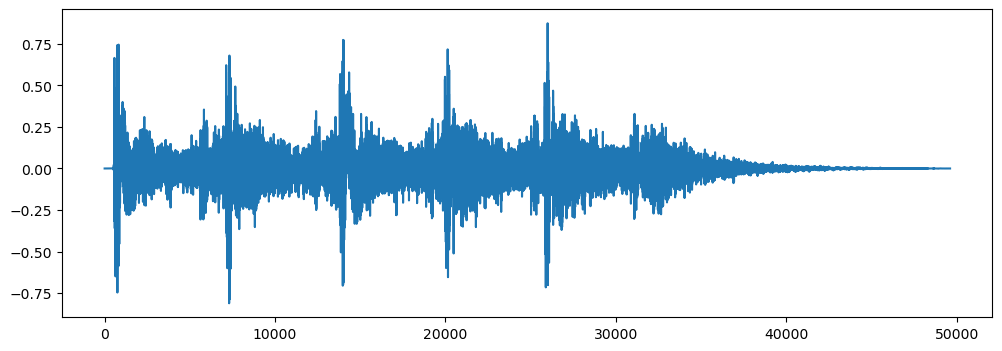

In [8]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)
plt.show()

In [9]:
from IPython.display import Audio
Audio("audio/fold1/7061-6-0-0.wav")

In [10]:
df = pd.read_csv("C:/Users/murat/Desktop/COURSES/UrbanSound8K/metadata/UrbanSound8K.csv")

'''We will extract classes from this metadata.'''

df.head()
#df.tail()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [12]:
for i in range(1,11):
    path2 = 'C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold' + str(i)
    print(i,path2)
# Check whether the specified path exists or not
    isExist = os.path.exists(path2)

    if not isExist:
        # Create a new directory because it does not exist 
        os.makedirs(path2)



1 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1
2 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2
3 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3
4 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4
5 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5
6 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6
7 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7
8 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8
9 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9
10 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10


In [13]:
#********************RESIZING THE SPECTROGRAMS FIGURE OUTPUT SIZE 7X4 *****
#********************MAKING GRAY SCALE OF THE SPECRTOGRAMSe****************
#************STORING SPECTROGRAMS ON THE SPECIFIED DIRECTORIES*************

In [ ]:
arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])

for j in range (0,len(df),20):
    k=j+20
    if k>=8732:
        k=8732
        
    for i in range(j,k,1):
#    for i in range(0, 3, 1):
        path = 'C:/Users/murat/Desktop/COURSES/UrbanSound8K/audio/fold' + str(fold[i]) + '/' + arr[i]
        #print(i,str(fold[i]) + '/' + arr[i])
        data, sampling_rate = librosa.load(path)

    
#********************RESIZING THE SPECTROGRAMS FIGURE OUTPUT SIZE 7X4 *****
        plt.figure(figsize=(7, 4))
        D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
#********************MAKING GRAY SCALE OF THE SPECRTOGRAMSe****************    
        librosa.display.specshow(D, y_axis='linear',cmap='gray_r')
        plt.colorbar(format='%+2.0f dB')
        plt.title(cla[i]+str(i))
    
#************STORING SPECTROGRAMS ON THE SPECIFIED DIRECTORIES*************
        figout =df["slice_file_name"][i]
        figout=figout[:figout.index(".")]+".png"
        path2 = 'C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold' + str(fold[i]) + '/' + figout
        print(i,path2)
        plt.savefig(path2)

0 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100032-3-0-0.png
1 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100263-2-0-117.png
2 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100263-2-0-121.png
3 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100263-2-0-126.png
4 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100263-2-0-137.png
5 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100263-2-0-143.png
6 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100263-2-0-161.png
7 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100263-2-0-3.png
8 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100263-2-0-36.png
9 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/100648-1-0-0.png
10 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/100648-1-1-0.png
11 C:/Users/murat/Desktop/COURSES/UrbanSound8K/sp

C:\Users\murat\AppData\Local\Temp\ipykernel_12852\1013589351.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7, 4))


20 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/100795-3-1-1.png
21 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/100795-3-1-2.png
22 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100852-0-0-0.png
23 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100852-0-0-1.png
24 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100852-0-0-10.png
25 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100852-0-0-11.png
26 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100852-0-0-12.png
27 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100852-0-0-13.png
28 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100852-0-0-14.png
29 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100852-0-0-15.png
30 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/100852-0-0-16.png
31 C:/Users/murat/Desktop/COURSES/UrbanSound8

115 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/102853-8-0-1.png
116 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/102853-8-0-2.png
117 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/102853-8-0-3.png
118 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/102853-8-0-4.png
119 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/102853-8-0-5.png
120 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/102853-8-0-6.png
121 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/102853-8-1-0.png
122 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/102857-5-0-0.png
123 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/102857-5-0-1.png
124 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/102857-5-0-10.png
125 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/102857-5-0-11.png
126 C:/Users/murat/Desktop/COURSES/Ur

209 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/103199-4-2-5.png
210 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/103199-4-2-6.png
211 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/103199-4-2-7.png
212 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/103199-4-2-8.png
213 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/103199-4-2-9.png
214 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/103199-4-4-0.png
215 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/103199-4-6-0.png
216 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/103199-4-7-2.png
217 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/103249-5-0-0.png
218 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/103249-5-0-1.png
219 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/103249-5-0-10.png
220 C:/Users/murat/Desktop/COURSES/UrbanSo

303 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/104817-4-0-5.png
304 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/104817-4-0-6.png
305 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/104817-4-0-7.png
306 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/104817-4-0-8.png
307 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/104817-4-0-9.png
308 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/104998-7-0-5.png
309 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/104998-7-10-1.png
310 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/104998-7-10-10.png
311 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/104998-7-10-13.png
312 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/104998-7-10-15.png
313 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/104998-7-10-8.png
314 C:/Users/murat/Desktop/COURSES/

397 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/105029-7-2-2.png
398 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/105029-7-2-3.png
399 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/105029-7-2-4.png
400 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/105029-7-2-5.png
401 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/105029-7-2-6.png
402 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/105029-7-2-7.png
403 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/105029-7-2-8.png
404 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/105029-7-2-9.png
405 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/105029-7-3-0.png
406 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/105029-7-3-1.png
407 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/105029-7-3-2.png
408 C:/Users/murat/Desktop/COURSES/UrbanSou

491 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/106905-5-0-2.png
492 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/106905-8-0-0.png
493 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/106905-8-0-1.png
494 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/106905-8-0-2.png
495 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/106905-8-0-3.png
496 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/106955-6-0-0.png
497 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/107090-1-0-0.png
498 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/107090-1-1-0.png
499 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/107190-3-0-0.png
500 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/107228-5-0-0.png
501 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/107228-5-0-1.png
502 C:/Users/murat/Desktop/COURSES/UrbanSou

585 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/109233-3-0-5.png
586 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/109233-3-0-6.png
587 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/109263-9-0-34.png
588 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/109263-9-0-39.png
589 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/109263-9-0-54.png
590 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/109263-9-0-61.png
591 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/109263-9-0-78.png
592 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/109703-2-0-134.png
593 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/109703-2-0-14.png
594 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/109703-2-0-153.png
595 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/109703-2-0-29.png
596 C:/Users/murat/Desktop/COURS

679 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/112195-3-0-80.png
680 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/113160-8-0-0.png
681 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/113201-5-0-0.png
682 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/113201-5-0-1.png
683 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/113201-5-0-2.png
684 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/113201-5-0-3.png
685 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/113201-5-0-4.png
686 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/113201-5-0-5.png
687 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/113201-5-0-6.png
688 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/113201-5-0-7.png
689 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/113202-5-0-0.png
690 C:/Users/murat/Desktop/COURSES/UrbanSo

773 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/115239-9-0-5.png
774 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/115240-9-0-1.png
775 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/115240-9-0-16.png
776 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/115240-9-0-28.png
777 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/115240-9-0-34.png
778 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/115240-9-0-36.png
779 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/115240-9-0-4.png
780 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/115241-9-0-1.png
781 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/115241-9-0-14.png
782 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/115241-9-0-2.png
783 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/115241-9-0-20.png
784 C:/Users/murat/Desktop/COURSE

867 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/117271-3-0-3.png
868 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/117536-1-0-0.png
869 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/117889-9-0-12.png
870 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/117889-9-0-20.png
871 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/117889-9-0-30.png
872 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/117889-9-0-36.png
873 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/117889-9-0-39.png
874 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/117889-9-0-40.png
875 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/118070-1-0-0.png
876 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/118072-3-0-0.png
877 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/118101-3-0-0.png
878 C:/Users/murat/Desktop/COUR

961 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/119809-7-0-2.png
962 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/119809-7-0-3.png
963 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/119809-7-0-4.png
964 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/119809-7-0-5.png
965 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/119809-7-0-6.png
966 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/121285-0-0-0.png
967 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/121285-0-0-1.png
968 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/121285-0-0-2.png
969 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/121285-0-0-3.png
970 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/121285-0-0-4.png
971 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/121285-0-0-5.png
972 C:/Users/murat/Desktop/COURSES/UrbanSou

1055 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/124389-8-1-1.png
1056 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/124389-8-1-10.png
1057 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/124389-8-1-11.png
1058 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/124389-8-1-12.png
1059 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/124389-8-1-13.png
1060 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/124389-8-1-14.png
1061 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/124389-8-1-15.png
1062 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/124389-8-1-16.png
1063 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/124389-8-1-17.png
1064 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/124389-8-1-18.png
1065 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/124389-8-1-2.png
1066 C:/Users/murat/Des

1148 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/12647-3-3-0.png
1149 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/126521-3-0-12.png
1150 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/126521-3-0-17.png
1151 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/126521-3-0-18.png
1152 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/126521-3-0-2.png
1153 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/127443-4-0-0.png
1154 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/127443-4-0-1.png
1155 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/127443-4-0-10.png
1156 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/127443-4-0-11.png
1157 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/127443-4-0-12.png
1158 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/127443-4-0-2.png
1159 C:/Users/murat/Desktop

1241 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/129750-2-0-46.png
1242 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/129750-2-0-48.png
1243 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/130030-3-0-0.png
1244 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/130961-4-0-0.png
1245 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/130961-4-1-1.png
1246 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/130961-4-1-2.png
1247 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/130961-4-1-3.png
1248 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/130961-4-1-4.png
1249 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/130961-4-2-1.png
1250 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/130961-4-2-2.png
1251 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/130961-4-3-0.png
1252 C:/Users/murat/Desktop/

1334 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/13230-0-0-18.png
1335 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/13230-0-0-19.png
1336 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/13230-0-0-20.png
1337 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/13230-0-0-22.png
1338 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/13230-0-0-23.png
1339 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/13230-0-0-24.png
1340 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/13230-0-0-25.png
1341 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/13230-0-0-26.png
1342 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/13230-0-0-27.png
1343 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/13230-0-0-28.png
1344 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/13230-0-0-3.png
1345 C:/Users/murat/Desktop/COURS

1427 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/135526-6-3-0.png
1428 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/135526-6-4-0.png
1429 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/135526-6-5-0.png
1430 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/135526-6-6-0.png
1431 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/135526-6-7-0.png
1432 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/135526-6-8-0.png
1433 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/135526-6-9-0.png
1434 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/135527-6-0-0.png
1435 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/135527-6-1-0.png
1436 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/135527-6-10-0.png
1437 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/135527-6-11-0.png
1438 C:/Users/murat/Desktop/CO

1520 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/136399-6-6-0.png
1521 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/136399-6-7-0.png
1522 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/136399-6-8-0.png
1523 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/136399-6-9-0.png
1524 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/136558-9-0-1.png
1525 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/136558-9-0-2.png
1526 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/136558-9-1-10.png
1527 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/136558-9-1-21.png
1528 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/136558-9-1-26.png
1529 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/136558-9-1-39.png
1530 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/137156-9-0-28.png
1531 C:/Users/murat/D

1613 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/14111-4-0-1.png
1614 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/14111-4-0-2.png
1615 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/14111-4-0-3.png
1616 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/14111-4-0-4.png
1617 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/14111-4-0-5.png
1618 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/14111-4-0-6.png
1619 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/14111-4-0-7.png
1620 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/14113-4-0-0.png
1621 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/14113-4-0-1.png
1622 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/14114-4-0-0.png
1623 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/14114-4-0-1.png
1624 C:/Users/murat/Desktop/COURSES/UrbanSo

1706 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/144007-5-1-4.png
1707 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/144007-5-1-5.png
1708 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/144007-5-1-6.png
1709 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/144007-5-1-7.png
1710 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/144007-5-1-8.png
1711 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/144007-5-1-9.png
1712 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/144028-3-0-0.png
1713 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/144028-3-1-0.png
1714 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/144028-3-1-1.png
1715 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/144068-5-0-0.png
1716 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/144068-5-0-1.png
1717 C:/Users/murat/Desktop/COUR

1799 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/145390-9-0-26.png
1800 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/145390-9-0-3.png
1801 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/145390-9-0-34.png
1802 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/145390-9-0-7.png
1803 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/145577-1-0-0.png
1804 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/145608-6-0-0.png
1805 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/145608-6-1-0.png
1806 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/145608-6-2-0.png
1807 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/145608-6-3-0.png
1808 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/145609-6-0-0.png
1809 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/145609-6-1-0.png
1810 C:/Users/murat/Desktop/CO

1892 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/146714-0-0-12.png
1893 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/146714-0-0-13.png
1894 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/146714-0-0-17.png
1895 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/146714-0-0-18.png
1896 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/146714-0-0-2.png
1897 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/146714-0-0-21.png
1898 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/146714-0-0-22.png
1899 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/146714-0-0-27.png
1900 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/146714-0-0-33.png
1901 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/146714-0-0-35.png
1902 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/146714-0-0-36.png
1903 C:/Users/murat/De

1985 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/147926-0-0-16.png
1986 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/147926-0-0-17.png
1987 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/147926-0-0-2.png
1988 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/147926-0-0-20.png
1989 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/147926-0-0-21.png
1990 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/147926-0-0-27.png
1991 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/147926-0-0-28.png
1992 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/147926-0-0-34.png
1993 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/147926-0-0-35.png
1994 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/147926-0-0-36.png
1995 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/147926-0-0-37.png
1996 C:/Users/murat/De

2078 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/149255-9-0-13.png
2079 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/149255-9-0-3.png
2080 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/149255-9-0-4.png
2081 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/149255-9-0-5.png
2082 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/149255-9-0-7.png
2083 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/149370-9-0-15.png
2084 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/149370-9-0-19.png
2085 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/149370-9-0-21.png
2086 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/149370-9-0-22.png
2087 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/149370-9-0-32.png
2088 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/149370-9-0-37.png
2089 C:/Users/murat/Deskt

2171 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/15356-2-0-2.png
2172 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/15356-2-0-3.png
2173 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/15356-2-0-4.png
2174 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/154758-5-0-0.png
2175 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/154758-5-0-1.png
2176 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/154758-5-0-10.png
2177 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/154758-5-0-11.png
2178 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/154758-5-0-12.png
2179 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/154758-5-0-13.png
2180 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/154758-5-0-14.png
2181 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/154758-5-0-15.png
2182 C:/Users/murat/Desktop/C

2264 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/155242-9-0-4.png
2265 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/155242-9-0-44.png
2266 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/155243-9-0-18.png
2267 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/155243-9-0-24.png
2268 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/155243-9-0-32.png
2269 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/155243-9-0-42.png
2270 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/155243-9-0-53.png
2271 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/155243-9-0-55.png
2272 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/155262-2-0-101.png
2273 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/155262-2-0-11.png
2274 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/155262-2-0-15.png
2275 C:/Users/mura

2357 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/156362-4-2-1.png
2358 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/156362-4-3-0.png
2359 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/156362-4-3-1.png
2360 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/156362-4-3-2.png
2361 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/156362-4-3-3.png
2362 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/156362-4-3-4.png
2363 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/156362-4-3-5.png
2364 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/156362-4-3-6.png
2365 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/156362-4-3-7.png
2366 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/156362-4-3-8.png
2367 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/156418-3-0-0.png
2368 C:/Users/murat/Desktop/COUR

2450 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/157801-6-0-0.png
2451 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/157866-8-0-0.png
2452 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/157866-8-0-1.png
2453 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/157866-8-0-10.png
2454 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/157866-8-0-11.png
2455 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/157866-8-0-12.png
2456 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/157866-8-0-13.png
2457 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/157866-8-0-14.png
2458 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/157866-8-0-15.png
2459 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/157866-8-0-16.png
2460 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/157866-8-0-17.png
2461 C:/Users/murat/Desk

2543 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/158593-2-0-0.png
2544 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/158593-2-0-31.png
2545 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/158593-2-0-43.png
2546 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/158593-2-0-47.png
2547 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/158593-2-0-52.png
2548 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/158593-2-0-54.png
2549 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/158593-2-0-8.png
2550 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/158597-2-0-16.png
2551 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/158597-2-0-2.png
2552 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/158597-2-0-3.png
2553 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/158597-2-0-30.png
2554 C:/Users/murat/Deskt

2636 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/159738-8-0-5.png
2637 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/159738-8-0-6.png
2638 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/159738-8-0-7.png
2639 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/159738-8-0-8.png
2640 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/159738-8-0-9.png
2641 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/159742-8-0-0.png
2642 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/159742-8-0-1.png
2643 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/159742-8-0-10.png
2644 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/159742-8-0-11.png
2645 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/159742-8-0-12.png
2646 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/159742-8-0-13.png
2647 C:/Users/murat/De

2729 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/159750-8-0-7.png
2730 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/159750-8-0-8.png
2731 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/159751-8-0-0.png
2732 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/159751-8-0-1.png
2733 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/159751-8-0-10.png
2734 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/159751-8-0-11.png
2735 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/159751-8-0-12.png
2736 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/159751-8-0-13.png
2737 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/159751-8-0-14.png
2738 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/159751-8-0-15.png
2739 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/159751-8-0-16.png
2740 C:/Users/murat/Deskt

2822 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/160016-2-0-26.png
2823 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/160016-2-0-37.png
2824 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/160016-2-0-40.png
2825 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/160016-2-0-5.png
2826 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/160016-2-0-8.png
2827 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/160092-3-0-0.png
2828 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/160093-3-0-0.png
2829 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/160094-3-0-0.png
2830 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/160366-3-0-13.png
2831 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/160366-3-0-4.png
2832 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/160366-3-0-7.png
2833 C:/Users/murat/Desktop/

2915 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/162134-7-11-7.png
2916 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/162134-7-12-0.png
2917 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/162134-7-12-1.png
2918 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/162134-7-12-2.png
2919 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/162134-7-12-3.png
2920 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/162134-7-12-4.png
2921 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/162134-7-13-0.png
2922 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/162134-7-13-1.png
2923 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/162134-7-13-2.png
2924 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/162134-7-13-3.png
2925 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/162134-7-13-4.png
2926 C:/Us

3008 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/162540-1-2-0.png
3009 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/162541-1-0-0.png
3010 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/162541-1-1-0.png
3011 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/162541-1-2-0.png
3012 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/162702-1-0-0.png
3013 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/162702-1-1-0.png
3014 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/162703-1-0-0.png
3015 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/162728-1-0-0.png
3016 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/163459-3-0-0.png
3017 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/163460-6-0-0.png
3018 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/164053-8-0-0.png
3019 C:/Users/murat/Desktop/COU

3101 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/165067-2-0-111.png
3102 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/165067-2-0-112.png
3103 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/165067-2-0-35.png
3104 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/165067-2-0-56.png
3105 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/165067-2-0-72.png
3106 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/165067-2-0-9.png
3107 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/165067-2-0-91.png
3108 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/165166-8-0-0.png
3109 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/165166-8-0-1.png
3110 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/165166-8-0-2.png
3111 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/165166-8-0-3.png
3112 C:/Users/murat/

3194 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/166421-3-0-31.png
3195 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/166421-3-0-5.png
3196 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/166489-3-0-1.png
3197 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/166489-3-0-2.png
3198 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/166489-3-0-4.png
3199 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/16692-5-0-0.png
3200 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/16692-5-0-1.png
3201 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/16692-5-0-10.png
3202 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/16692-5-0-2.png
3203 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/16692-5-0-3.png
3204 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/16692-5-0-4.png
3205 C:/Users/murat/Desktop/COURSES/

3287 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/167702-4-2-0.png
3288 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/167702-4-3-0.png
3289 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/167702-4-4-0.png
3290 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/167702-4-5-0.png
3291 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/167702-4-6-0.png
3292 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/167702-4-7-0.png
3293 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/167702-4-7-1.png
3294 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/167702-4-8-0.png
3295 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/167702-4-9-0.png
3296 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/16772-8-0-0.png
3297 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/167750-4-0-0.png
3298 C:/Users/murat/Desktop/COUR

3380 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/169098-7-0-8.png
3381 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/169098-7-0-9.png
3382 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/169098-7-1-0.png
3383 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/169098-7-2-0.png
3384 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/169098-7-3-0.png
3385 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/169098-7-3-1.png
3386 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/169098-7-4-0.png
3387 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/169098-7-4-1.png
3388 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/169098-7-4-10.png
3389 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/169098-7-4-11.png
3390 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/169098-7-4-2.png
3391 C:/Users/murat/Desktop/CO

3474 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/171305-7-18-0.png
3475 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/171305-7-19-0.png
3476 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/171305-7-2-0.png
3477 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/171305-7-20-0.png
3478 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/171305-7-21-0.png
3479 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/171305-7-22-0.png
3480 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/171305-7-23-0.png
3481 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/171305-7-24-0.png
3482 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/171305-7-25-0.png
3483 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/171305-7-26-0.png
3484 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/171305-7-27-0.png
3485 C:/Users/murat/De

C:\Users\murat\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)


3555 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/17307-1-0-0.png
3556 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/173891-9-0-1.png
3557 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/173891-9-0-10.png
3558 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/173891-9-0-11.png
3559 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/173891-9-0-17.png
3560 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/173891-9-0-2.png
3561 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/173891-9-0-7.png
3562 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/173993-3-0-25.png
3563 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/173993-3-0-39.png
3564 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/173993-3-0-51.png
3565 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/173993-3-0-52.png
3566 C:/Users/murat/Deskto

3648 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/174906-2-0-11.png
3649 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/174906-2-0-14.png
3650 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/174906-2-0-18.png
3651 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/174906-2-0-20.png
3652 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/174906-2-0-21.png
3653 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/174906-2-0-6.png
3654 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/174906-2-0-8.png
3655 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/174994-3-0-0.png
3656 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/174994-3-0-1.png
3657 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/174994-3-0-2.png
3658 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/174994-3-0-4.png
3659 C:/Users/murat/Desktop

3741 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/17615-3-0-6.png
3742 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/176257-3-0-0.png
3743 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/176258-3-1-12.png
3744 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/176258-3-1-13.png
3745 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/176258-3-1-18.png
3746 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/176258-3-1-2.png
3747 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/176631-1-0-0.png
3748 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/176634-1-0-0.png
3749 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/176638-1-0-0.png
3750 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/176638-1-1-0.png
3751 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/176638-5-0-0.png
3752 C:/Users/murat/Desktop/CO

3834 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177537-7-1-4.png
3835 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177537-7-1-5.png
3836 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177537-7-1-6.png
3837 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177537-7-1-7.png
3838 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177537-7-1-8.png
3839 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177537-7-1-9.png
3840 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177537-7-2-0.png
3841 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177537-7-2-1.png
3842 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/177592-5-0-0.png
3843 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/177592-5-0-1.png
3844 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/177592-5-0-10.png
3845 C:/Users/murat/Desktop/COU

3927 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177729-0-0-42.png
3928 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177729-0-0-50.png
3929 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177729-0-0-51.png
3930 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177729-0-0-53.png
3931 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177729-0-0-58.png
3932 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177729-0-0-63.png
3933 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177729-0-0-67.png
3934 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177729-0-0-68.png
3935 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177729-0-0-69.png
3936 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177729-0-0-73.png
3937 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/177729-0-0-74.png
3938 C:/Users/murat/D

4020 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/178260-7-6-0.png
4021 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/178260-7-7-0.png
4022 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178261-7-0-0.png
4023 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178261-7-1-0.png
4024 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178261-7-2-0.png
4025 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178261-7-3-0.png
4026 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178261-7-3-1.png
4027 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178261-7-3-2.png
4028 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178261-7-3-3.png
4029 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178261-7-3-4.png
4030 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178261-7-3-5.png
4031 C:/Users/murat/Des

4113 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/178825-2-0-95.png
4114 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178826-2-0-10.png
4115 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178826-2-0-12.png
4116 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178826-2-0-14.png
4117 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178826-2-0-16.png
4118 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178826-2-0-17.png
4119 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178826-2-0-20.png
4120 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178826-2-0-28.png
4121 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/178826-2-0-39.png
4122 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/179039-9-0-22.png
4123 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold8/179039-9-0-23.png
4124 C:/Users

4206 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/180125-4-3-4.png
4207 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/180126-4-0-0.png
4208 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/180126-4-1-0.png
4209 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/180126-4-1-1.png
4210 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/180126-4-1-2.png
4211 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/180126-4-2-0.png
4212 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/180126-4-3-0.png
4213 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/180126-4-4-0.png
4214 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/180126-4-4-1.png
4215 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/180126-4-4-2.png
4216 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/180127-4-0-0.png
4217 C:/Users/murat/Desktop/COU

4299 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/180937-4-0-11.png
4300 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/180937-4-0-13.png
4301 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/180937-4-0-14.png
4302 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/180937-4-0-19.png
4303 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/180937-4-0-20.png
4304 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/180937-4-1-12.png
4305 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/180937-4-1-20.png
4306 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/180937-4-1-27.png
4307 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/180937-4-1-30.png
4308 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/180937-4-1-46.png
4309 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/180937-4-1-47.png
4310 C:/Users/murat/D

4392 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/180937-7-4-8.png
4393 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/180937-7-4-9.png
4394 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/180960-6-0-0.png
4395 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/180977-3-1-0.png
4396 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/180977-3-1-1.png
4397 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/180977-3-1-5.png
4398 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/181102-9-0-111.png
4399 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/181102-9-0-117.png
4400 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/181102-9-0-23.png
4401 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/181102-9-0-26.png
4402 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/181102-9-0-50.png
4403 C:/Users/murat/Deskt

4485 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/184805-0-0-27.png
4486 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/184805-0-0-32.png
4487 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/184805-0-0-34.png
4488 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/184805-0-0-4.png
4489 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/184805-0-0-40.png
4490 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/184805-0-0-45.png
4491 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/184805-0-0-47.png
4492 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/184805-0-0-48.png
4493 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/184805-0-0-49.png
4494 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/184805-0-0-5.png
4495 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/184805-0-0-51.png
4496 C:/Users/murat/Des

4578 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/18594-1-6-0.png
4579 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/186334-2-0-1.png
4580 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/186334-2-0-11.png
4581 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/186334-2-0-20.png
4582 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/186334-2-0-33.png
4583 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/186334-2-0-35.png
4584 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/186334-2-0-36.png
4585 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/186334-2-0-37.png
4586 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/186334-2-0-44.png
4587 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/186336-9-0-0.png
4588 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/186336-9-0-1.png
4589 C:/Users/murat/Deskto

4671 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/188813-7-7-0.png
4672 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/188813-7-8-0.png
4673 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/188813-7-9-0.png
4674 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/188823-7-0-0.png
4675 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/188823-7-0-1.png
4676 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/188823-7-0-2.png
4677 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/188823-7-0-3.png
4678 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/188823-7-0-4.png
4679 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/188823-7-1-0.png
4680 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/188823-7-1-1.png
4681 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold9/188823-7-1-2.png
4682 C:/Users/murat/Desktop/C

4764 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/189982-0-0-38.png
4765 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/189982-0-0-39.png
4766 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/189982-0-0-4.png
4767 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/189982-0-0-42.png
4768 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/189982-0-0-43.png
4769 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/189982-0-0-44.png
4770 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/189982-0-0-45.png
4771 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/189982-0-0-6.png
4772 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/189982-0-0-7.png
4773 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/189985-0-0-0.png
4774 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/189985-0-0-1.png
4775 C:/Users/m

4857 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/192124-2-0-7.png
4858 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/19218-3-0-0.png
4859 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/192236-3-0-2.png
4860 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/192236-3-0-4.png
4861 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/192236-3-0-6.png
4862 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/192236-3-0-8.png
4863 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/192269-2-0-1.png
4864 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/192269-2-0-11.png
4865 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/192269-2-0-18.png
4866 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/192269-2-0-24.png
4867 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/192269-2-0-35.png
4868 C:/Users/murat/Desktop/C

4950 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/194841-9-0-164.png
4951 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/194841-9-0-178.png
4952 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/194841-9-0-222.png
4953 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/194841-9-0-48.png
4954 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/194910-9-0-108.png
4955 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/194910-9-0-26.png
4956 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/194910-9-0-5.png
4957 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/194910-9-0-63.png
4958 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/194910-9-0-65.png
4959 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/19496-3-0-0.png
4960 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/19496-3-1-0.png
4961 C:/Users/murat/De

5043 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/196075-2-0-0.png
5044 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/196076-2-0-0.png
5045 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/196077-2-0-0.png
5046 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold6/196077-2-0-1.png
5047 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/196078-2-0-0.png
5048 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold1/196079-2-0-0.png
5049 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold4/196080-2-0-0.png
5050 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold5/196081-2-0-0.png
5051 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold2/196082-2-0-0.png
5052 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/196083-2-0-0.png
5053 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/196084-2-0-0.png
5054 C:/Users/murat/Desktop/COU

5136 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/199769-1-0-10.png
5137 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/199769-1-0-11.png
5138 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/199769-1-0-12.png
5139 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/199769-1-0-13.png
5140 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/199769-1-0-14.png
5141 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/199769-1-0-15.png
5142 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/199769-1-0-16.png
5143 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/199769-1-0-17.png
5144 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/199769-1-0-18.png
5145 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/199769-1-0-2.png
5146 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold3/199769-1-0-3.png
5147 C:/Users/murat/Des

5229 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/201988-5-0-3.png
5230 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/201988-5-0-4.png
5231 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/201988-5-0-5.png
5232 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/201988-5-0-6.png
5233 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/201988-5-0-7.png
5234 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/201988-5-0-8.png
5235 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/201988-5-0-9.png
5236 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold7/201988-5-1-0.png
5237 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/202334-9-0-105.png
5238 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/202334-9-0-106.png
5239 C:/Users/murat/Desktop/COURSES/UrbanSound8K/spectrograms_GS/fold10/202334-9-0-137.png
5240 C:/Users/murat/Des

In [14]:
#hafıza doldu burda kestim o yüzden

In [129]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate,n_mfcc = 60)

In [130]:
mfccs.shape

(60, 97)

In [131]:
audio_dataset_path = "audio"
metadata = pd.read_csv("metadata/UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [132]:
def feature_extractor(file):
    audio,sample_rate = librosa.load(file_name,res_type="kaiser_fast")
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=60)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

In [133]:
#append to the list
extracted_features =[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), "fold" + str(row["fold"])+"/", str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [02:50, 21.35it/s]C:\Users\murat\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8326it [06:24, 30.37it/s]C:\Users\murat\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\murat\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [06:42, 21.72it/s]


In [134]:
extracted_features_df = pd.DataFrame(extracted_features, columns =["features", "class"])
extracted_features_df.head()

,features,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [135]:
x = np.array(extracted_features_df["features"].tolist())
y = np.array(extracted_features_df["class"].tolist())

In [136]:
x.shape

(8732, 60)

In [137]:
y.shape

(8732,)

In [138]:
labelencoder =LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [139]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [140]:
#%80 Train %20 Test
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size =0.2,random_state = 0)

In [141]:
xtrain

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
        -2.13541105e-01, -8.76120508e-01,  1.59227300e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -1.83715713e+00, -2.02924323e+00,  1.05613601e+00],
       [-4.98715439e+01,  2.65353173e-01, -2.05009365e+01, ...,
         2.68898845e+00,  3.33582491e-01,  1.32958972e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939763e+00, ...,
         8.18326890e-01,  2.79669613e-01,  7.88387239e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         6.53382301e-01, -6.64809167e-01, -3.40239018e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -1.88740742e+00, -1.28404188e+00, -2.64248824e+00]], dtype=float32)

In [142]:
# exported x,y,xtrain,xtest,ytrain,ytest to the files
with open('x.csv', 'w') as my_file:
        for i in x:
            np.savetxt(my_file,i)
print('x exported to file')

with open('y.csv', 'w') as my_file:
        for i in y:
            np.savetxt(my_file,i)
print('y exported to file')

with open('xtrain.csv', 'w') as my_file:
        for i in xtrain:
            np.savetxt(my_file,i)
print('xtrain exported to file')

with open('ytrain.csv', 'w') as my_file:
        for i in ytrain:
            np.savetxt(my_file,i)
print('ytrain exported to file')

with open('xtest.csv', 'w') as my_file:
        for i in xtest:
            np.savetxt(my_file,i)
print('xtest exported to file')

with open('ytest.csv', 'w') as my_file:
        for i in ytest:
            np.savetxt(my_file,i)
print('ytest exported to file')


x exported to file
y exported to file
xtrain exported to file
ytrain exported to file
xtest exported to file
ytest exported to file


In [39]:
num_labels = 10

In [143]:
# yapay sinir ağı modeli katmanları
model = Sequential()

model.add(Dense(125,input_shape =(60,)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
# 2. gizli
model.add(Dense(250))
model.add(Activation("relu"))
model.add(Dropout(0.5))
# 3. gizli
model.add(Dense(125))
model.add(Activation("relu"))
model.add(Dropout(0.5))
#output
model.add(Dense(num_labels))
model.add(Activation("softmax"))



In [144]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 125)               7625      
                                                                 
 activation_8 (Activation)   (None, 125)               0         
                                                                 
 dropout_6 (Dropout)         (None, 125)               0         
                                                                 
 dense_9 (Dense)             (None, 250)               31500     
                                                                 
 activation_9 (Activation)   (None, 250)               0         
                                                                 
 dropout_7 (Dropout)         (None, 250)               0         
                                                                 
 dense_10 (Dense)            (None, 125)              

In [145]:
#adam used as optimizer
model.compile(loss = "categorical_crossentropy", metrics =["accuracy"], optimizer ="adam")

In [146]:
results=model.fit(xtrain, ytrain, epochs = 400, batch_size = 64, validation_data = (xtest, ytest),verbose=1)
#learning is going to be start

Epoch 1/400
110/110 [==============================] - 1s 8ms/step - loss: 10.4805 - accuracy: 0.1188 - val_loss: 2.2947 - val_accuracy: 0.1133
Epoch 2/400
110/110 [==============================] - 0s 4ms/step - loss: 2.6127 - accuracy: 0.1337 - val_loss: 2.2873 - val_accuracy: 0.1128
Epoch 3/400
110/110 [==============================] - 0s 4ms/step - loss: 2.3451 - accuracy: 0.1417 - val_loss: 2.2283 - val_accuracy: 0.1500
Epoch 4/400
110/110 [==============================] - 0s 4ms/step - loss: 2.2672 - accuracy: 0.1532 - val_loss: 2.1622 - val_accuracy: 0.1746
Epoch 5/400
110/110 [==============================] - 0s 4ms/step - loss: 2.2109 - accuracy: 0.1636 - val_loss: 2.1326 - val_accuracy: 0.1706
Epoch 6/400
110/110 [==============================] - 0s 4ms/step - loss: 2.1804 - accuracy: 0.1748 - val_loss: 2.1079 - val_accuracy: 0.1717
Epoch 7/400
110/110 [==============================] - 0s 4ms/step - loss: 2.1486 - accuracy: 0.1850 - val_loss: 2.0901 - val_accuracy: 0.188

Epoch 58/400
110/110 [==============================] - 0s 4ms/step - loss: 0.8872 - accuracy: 0.7112 - val_loss: 0.7429 - val_accuracy: 0.7619
Epoch 59/400
110/110 [==============================] - 0s 4ms/step - loss: 0.9086 - accuracy: 0.7011 - val_loss: 0.7692 - val_accuracy: 0.7613
Epoch 60/400
110/110 [==============================] - 0s 4ms/step - loss: 0.8854 - accuracy: 0.7079 - val_loss: 0.7295 - val_accuracy: 0.7562
Epoch 61/400
110/110 [==============================] - 0s 4ms/step - loss: 0.8784 - accuracy: 0.7105 - val_loss: 0.7170 - val_accuracy: 0.7779
Epoch 62/400
110/110 [==============================] - 0s 4ms/step - loss: 0.8742 - accuracy: 0.7034 - val_loss: 0.7367 - val_accuracy: 0.7630
Epoch 63/400
110/110 [==============================] - 0s 4ms/step - loss: 0.8713 - accuracy: 0.7102 - val_loss: 0.7288 - val_accuracy: 0.7682
Epoch 64/400
110/110 [==============================] - 0s 4ms/step - loss: 0.8480 - accuracy: 0.7162 - val_loss: 0.7086 - val_accuracy:

Epoch 115/400
110/110 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.7738 - val_loss: 0.5673 - val_accuracy: 0.8185
Epoch 116/400
110/110 [==============================] - 0s 4ms/step - loss: 0.7111 - accuracy: 0.7655 - val_loss: 0.5909 - val_accuracy: 0.8042
Epoch 117/400
110/110 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.7694 - val_loss: 0.5524 - val_accuracy: 0.8248
Epoch 118/400
110/110 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.7712 - val_loss: 0.5473 - val_accuracy: 0.8323
Epoch 119/400
110/110 [==============================] - 0s 4ms/step - loss: 0.7178 - accuracy: 0.7685 - val_loss: 0.5852 - val_accuracy: 0.8220
Epoch 120/400
110/110 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.7704 - val_loss: 0.5576 - val_accuracy: 0.8271
Epoch 121/400
110/110 [==============================] - 0s 4ms/step - loss: 0.6968 - accuracy: 0.7675 - val_loss: 0.5538 - val_ac

110/110 [==============================] - 0s 4ms/step - loss: 0.6298 - accuracy: 0.7967 - val_loss: 0.5099 - val_accuracy: 0.8437
Epoch 172/400
110/110 [==============================] - 0s 4ms/step - loss: 0.6253 - accuracy: 0.7881 - val_loss: 0.4902 - val_accuracy: 0.8460
Epoch 173/400
110/110 [==============================] - 0s 4ms/step - loss: 0.6437 - accuracy: 0.7848 - val_loss: 0.5157 - val_accuracy: 0.8311
Epoch 174/400
110/110 [==============================] - 0s 4ms/step - loss: 0.6443 - accuracy: 0.7864 - val_loss: 0.5087 - val_accuracy: 0.8460
Epoch 175/400
110/110 [==============================] - 0s 4ms/step - loss: 0.6384 - accuracy: 0.7916 - val_loss: 0.5069 - val_accuracy: 0.8477
Epoch 176/400
110/110 [==============================] - 0s 4ms/step - loss: 0.6242 - accuracy: 0.7980 - val_loss: 0.5331 - val_accuracy: 0.8380
Epoch 177/400
110/110 [==============================] - 0s 4ms/step - loss: 0.6268 - accuracy: 0.7903 - val_loss: 0.5104 - val_accuracy: 0.8357

110/110 [==============================] - 0s 4ms/step - loss: 0.5752 - accuracy: 0.8157 - val_loss: 0.4642 - val_accuracy: 0.8575
Epoch 228/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5835 - accuracy: 0.8052 - val_loss: 0.4975 - val_accuracy: 0.8512
Epoch 229/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5948 - accuracy: 0.8050 - val_loss: 0.4941 - val_accuracy: 0.8500
Epoch 230/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5935 - accuracy: 0.8073 - val_loss: 0.4804 - val_accuracy: 0.8580
Epoch 231/400
110/110 [==============================] - 1s 5ms/step - loss: 0.6128 - accuracy: 0.7970 - val_loss: 0.5014 - val_accuracy: 0.8500
Epoch 232/400
110/110 [==============================] - 0s 5ms/step - loss: 0.6055 - accuracy: 0.8013 - val_loss: 0.4916 - val_accuracy: 0.8489
Epoch 233/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5988 - accuracy: 0.8039 - val_loss: 0.4850 - val_accuracy: 0.8552

110/110 [==============================] - 0s 4ms/step - loss: 0.5759 - accuracy: 0.8122 - val_loss: 0.4710 - val_accuracy: 0.8569
Epoch 284/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5779 - accuracy: 0.8110 - val_loss: 0.4907 - val_accuracy: 0.8477
Epoch 285/400
110/110 [==============================] - 1s 5ms/step - loss: 0.6078 - accuracy: 0.8050 - val_loss: 0.4503 - val_accuracy: 0.8592
Epoch 286/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5729 - accuracy: 0.8084 - val_loss: 0.4689 - val_accuracy: 0.8563
Epoch 287/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.8153 - val_loss: 0.4659 - val_accuracy: 0.8615
Epoch 288/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5511 - accuracy: 0.8183 - val_loss: 0.4578 - val_accuracy: 0.8615
Epoch 289/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5465 - accuracy: 0.8189 - val_loss: 0.4435 - val_accuracy: 0.8598

110/110 [==============================] - 0s 4ms/step - loss: 0.5630 - accuracy: 0.8188 - val_loss: 0.4478 - val_accuracy: 0.8649
Epoch 340/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5347 - accuracy: 0.8246 - val_loss: 0.4547 - val_accuracy: 0.8620
Epoch 341/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5367 - accuracy: 0.8281 - val_loss: 0.4555 - val_accuracy: 0.8598
Epoch 342/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5441 - accuracy: 0.8226 - val_loss: 0.4540 - val_accuracy: 0.8655
Epoch 343/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5387 - accuracy: 0.8276 - val_loss: 0.4489 - val_accuracy: 0.8695
Epoch 344/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5576 - accuracy: 0.8170 - val_loss: 0.4777 - val_accuracy: 0.8609
Epoch 345/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5636 - accuracy: 0.8157 - val_loss: 0.4575 - val_accuracy: 0.8603

110/110 [==============================] - 0s 4ms/step - loss: 0.5440 - accuracy: 0.8258 - val_loss: 0.4714 - val_accuracy: 0.8500
Epoch 396/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5316 - accuracy: 0.8316 - val_loss: 0.4421 - val_accuracy: 0.8620
Epoch 397/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5431 - accuracy: 0.8301 - val_loss: 0.4518 - val_accuracy: 0.8683
Epoch 398/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5292 - accuracy: 0.8281 - val_loss: 0.4324 - val_accuracy: 0.8689
Epoch 399/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5508 - accuracy: 0.8263 - val_loss: 0.4511 - val_accuracy: 0.8632
Epoch 400/400
110/110 [==============================] - 0s 4ms/step - loss: 0.5211 - accuracy: 0.8315 - val_loss: 0.4468 - val_accuracy: 0.8632


In [147]:
validation_test_set_accuracy = model.evaluate(xtest,ytest,verbose = 0)
print(validation_test_set_accuracy[1])

0.8631940484046936


In [151]:
#prediction process is going to be start
filename="5.wav"
sound_signal,sample_rate = librosa.load(filename, res_type = "kaiser_fast")
mfccs_features = librosa.feature.mfcc(y=sound_signal, sr=sample_rate, n_mfcc=60)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)


In [152]:
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)

In [153]:
mfccs_scaled_features.shape

(1, 60)

In [154]:
result_array = model.predict(mfccs_scaled_features)

1/1 [==============================] - 0s 59ms/step


In [155]:
result_array

array([[2.8889110e-02, 3.9899130e-03, 2.5697409e-03, 8.2865286e-01,
        7.4595185e-03, 1.4597835e-03, 6.0520720e-02, 1.5846798e-04,
        3.2774322e-03, 6.3022546e-02]], dtype=float32)

In [156]:
result_classes = ["air_conditioner","car_horn","children_playing", "dog_bark", "drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music" ]

In [157]:
result_classes

['air_conditioner',
 'car_horn',
 'children_playing',
 'dog_bark',
 'drilling',
 'engine_idling',
 'gun_shot',
 'jackhammer',
 'siren',
 'street_music']

In [158]:
result = np.argmax(result_array[0])


In [159]:
result_classes[result]

'dog_bark'

In [160]:
Audio("5.wav")

In [162]:
#prediction process starting for the 10 randomly selected sounds
result_classes = ["air_conditioner","car_horn",
                  "children_playing", "dog_bark", 
                  "drilling", "engine_idling", 
                  "gun_shot", "jackhammer", "siren",
                  "street_music" ]
def tahmin(filename):
    sound_signal,sample_rate = librosa.load(filename, res_type = "kaiser_fast")
    mfccs_features = librosa.feature.mfcc(y=sound_signal, sr=sample_rate, n_mfcc=60)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
    result_array = model.predict(mfccs_scaled_features)
    result = np.argmax(result_array[0])
    print(result)
    result_classes[result]
    print(result_classes[result])
   

for i in range(1,11):
    filename =str(i)+ str(".wav")
    print(filename)
    tahmin(filename)

1.wav
1/1 [==============================] - 0s 19ms/step
5
engine_idling
2.wav
1/1 [==============================] - 0s 21ms/step
0
air_conditioner
3.wav
1/1 [==============================] - 0s 22ms/step
2
children_playing
4.wav
1/1 [==============================] - 0s 20ms/step
9
street_music
5.wav
1/1 [==============================] - 0s 21ms/step
3
dog_bark
6.wav
1/1 [==============================] - 0s 21ms/step
3
dog_bark
7.wav
1/1 [==============================] - 0s 20ms/step
1
car_horn
8.wav
1/1 [==============================] - 0s 21ms/step
7
jackhammer
9.wav
1/1 [==============================] - 0s 21ms/step
4
drilling
10.wav
1/1 [==============================] - 0s 22ms/step
3
dog_bark


In [163]:
a=input("1 -10 arası bir sayı giriniz :")
Audio(a+".wav")

1 -10 arası bir sayı giriniz :5


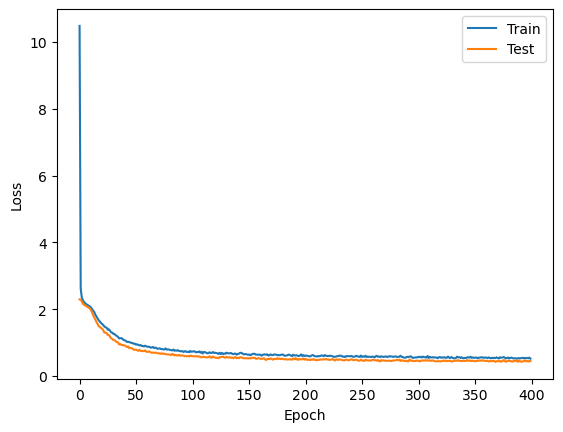

In [164]:
# Plot the the training loss
plt.plot(results.history['loss'], label ='Train')
# Plot the the validation loss
plt.plot(results.history['val_loss'], label ='Test')
# Name the x and y axises
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Put legend table
plt.legend()

# Show the plot
plt.show()